<a href="https://colab.research.google.com/github/Jeongsoowon/GOOROORINGS/blob/master/Ex_Moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving average


$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filter. 

Given a series of numbers ($y_1,\dots,y_N$) and a fixed subset size $n$, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

We implement a simple moving average $x_t$ of the given signal $y_t$ with window size $n$ as follows

$$
  x_t = 
  \begin{cases}
  \left( y_t + \cdots + y_{1}\right)/t &\quad \text{if } t\le n\\
  \left( y_t + y_{t-1} + \cdots + y_{t-n+1}\right)/n &\quad \text{otherwise }
  \end{cases}
$$

In this problem, you will examine the trend from the S&P 500 indices for the past 10 years. The following cell downloads the S&P 500 index from the past 10 years, and saves the dataframe in `df`.

In [ ]:
from pandas_datareader import data
 
df = data.DataReader('^GSPC', 'yahoo', start='9/25/2009')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-09-25,1053.469971,1041.170044,1049.479980,1044.380005,4507090000,1044.380005
2009-09-28,1065.130005,1045.380005,1045.380005,1062.979980,3726950000,1062.979980
2009-09-29,1069.619995,1057.829956,1063.689941,1060.609985,4949900000,1060.609985
2009-09-30,1063.400024,1046.469971,1061.020020,1057.079956,5998860000,1057.079956
2009-10-01,1054.910034,1029.449951,1054.910034,1029.849976,5791450000,1029.849976
2009-10-02,1030.599976,1019.950012,1029.709961,1025.209961,5583240000,1025.209961
2009-10-05,1042.579956,1025.920044,1026.869995,1040.459961,4313310000,1040.459961
2009-10-06,1060.550049,1042.020020,1042.020020,1054.719971,5029840000,1054.719971
2009-10-07,1058.020020,1050.099976,1053.650024,1057.579956,4238220000,1057.579956


We are especially interested in the trend on the "Adj Close" price, from which we will try to read the trend. 



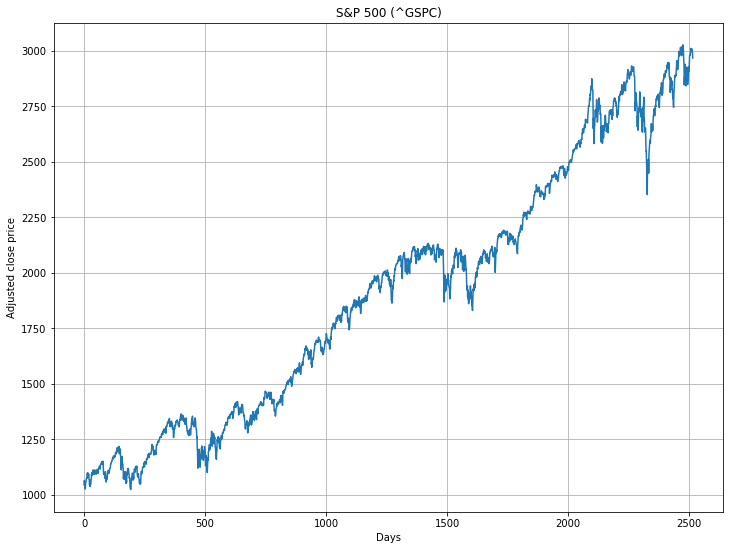

In [ ]:
import matplotlib.pyplot as plt


y = df['Adj Close'].values

plt.figure(figsize=(12,9))
plt.plot(y)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('S&P 500 (^GSPC)')
plt.show()

Design various moving average filters for $n=7, 30, 90, 180$. Overlap the raw "Adj Close" data and the five moving-averaged data on a single plot.

What do you observe?


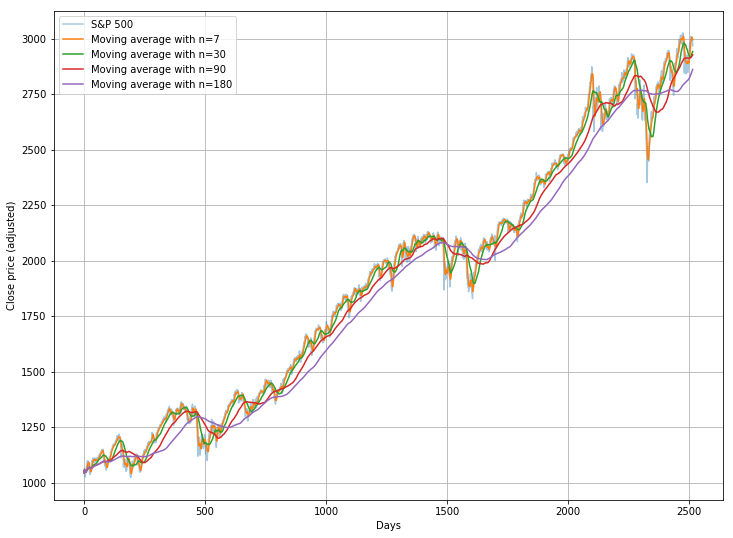

In [ ]:
# your code here
